 C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


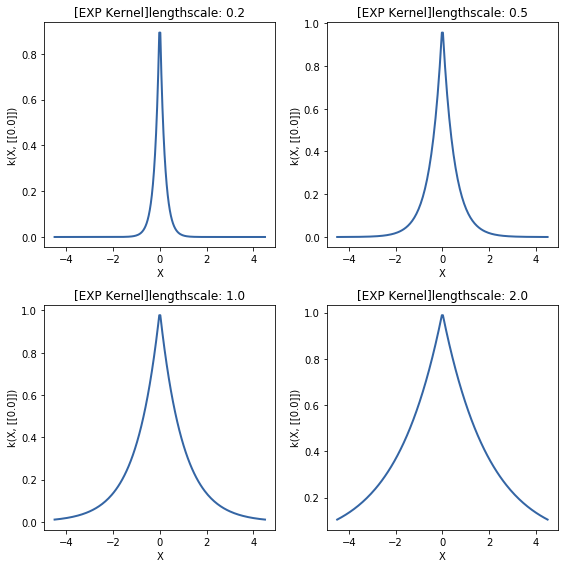

In [1]:
%matplotlib inline
import GPy
import numpy as np
import matplotlib.pyplot as plt

########################################
# Hyper Parameter
########################################

d = 1 # input dimension
variance = 1. # variance
lengthscale = 0.2 # lengthscale

########################################
# Kernel Function
########################################

k = GPy.kern.Exponential(d,variance,lengthscale)

########################################
# Plot product of kenels
########################################

lengthscale = np.asarray([0.2,0.5,1.,2.])
figure, axes = plt.subplots(2,2, figsize=(8,8), tight_layout=True)

for t,a in zip(lengthscale,axes.flatten()):
    k['.*lengthscale']=t
    k.plot(x=0,ax =a, title = "[EXP Kernel]lengthscale: "+str(t) )

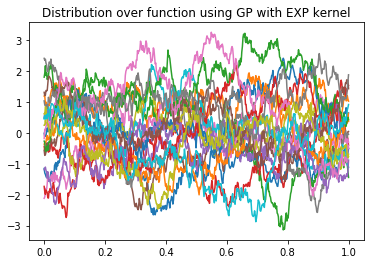

In [6]:
########################################
# Hyper Parameter
########################################

d = 1 # input dimension
variance = 1. # variance
lengthscale = 0.2 # lengthscale

########################################
# Kernel Function
########################################

k = GPy.kern.Exponential(d,variance,lengthscale)

########################################
# Plot product of kenels
########################################

np.random.seed(1) #난수 생성기 초기화 함수,

X_ = np.linspace(0.,1.,500) # 500 points evenly spaced over [0,1]
X_ = X_[:,None] # reshape X to make it n*D
mu = np.zeros((500)) # vector of the means
C = k.K(X_,X_) # covariance matrix

# Generate 20 sample path with mean mu and covariance C
Y_samples = np.random.multivariate_normal(mu,C,20)

plt.title("Distribution over function using GP with EXP kernel")
for i in range(20):
    plt.plot(X_[:],Y_samples[i,:])